# **DEEP LEARNING FINAL PROJECT**


### RON KEINAN 203735857






____________________________________________________________________________________________________________________________________________________________________________________

## Part 04 - Community classification with classic Deep Learning - RNN and LSTM

In [ ]:
from gensim.models import Word2Vec
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_numeric, strip_multiple_whitespaces
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

Importing the data set 

In [ ]:
data = pd.read_excel('COMMENTS_21.xlsx')

In [ ]:
data.head()

,Page Number,Community,Comment author,Comment,Post/Comment
0,562700,טרשת נפוצה,לביא שיפמן\n\n,"\nנאה דורש, נאה מקיים. \n\nאחרי שחפרתי לכם בנו...",post
1,562700,טרשת נפוצה,ערן ברקוביץ\n,:tmbsup:\n\n,comment
2,562700,טרשת נפוצה,עינת מילר\n,\n,comment
3,562700,טרשת נפוצה,עינת מילר\n,גם אני התחסנתי הערב\n\n,comment
4,562700,טרשת נפוצה,לביא שיפמן\n,אודה לך אם תוכלי למלא את טופס הדיווח - זה יסיי...,comment


#### Cleaning the data

In [ ]:
# get post and clean from non hebrew letters and stop words

def pre_process_text(text):
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # remove stop words
    text_ = [word for word in text.split() if word not in STOP_WORDS]

    # remove not hebrew letters
    my_word = re.sub(r'[^אבגדהוזחטיכלמנסעפצקרשתםןץףך]{3,}', ' ', ' '.join(text_))
    my_word2 = re.sub(r'(\s)([אבגדהוזחטיכלמנסעפצקרשתםןץףך])(\s)', ' ', my_word)
    return str(my_word2)

In [ ]:
STOP_WORDS = [
    'אני',
    'את',
    'אתה',
    'אנחנו',
    'אתן',
    'אתם',
    'הם',
    'הן',
    'היא',
    'הוא',
    'שלי',
    'שלו',
    'שלך',
    'שלה',
    'שלנו',
    'שלכם',
    'שלכן',
    'שלהם',
    'שלהן',
    'לי',
    'לו',
    'לה',
    'לנו',
    'לכם',
    'לכן',
    'להם',
    'להן',
    'אותה',
    'אותו',
    'זה',
    'זאת',
    'אלה',
    'אלו',
    'תחת',
    'מתחת',
    'מעל',
    'בין',
    'עם',
    'עד',
    'נגר',
    'על',
    'אל',
    'מול',
    'של',
    'אצל',
    'כמו',
    'אחר',
    'אותו',
    'בלי',
    'לפני',
    'אחרי',
    'מאחורי',
    'עלי',
    'עליו',
    'עליה',
    'עליך',
    'עלינו',
    'עליכם',
    'לעיכן',
    'עליהם',
    'עליהן',
    'כל',
    'כולם',
    'כולן',
    'כך',
    'ככה',
    'כזה',
    'זה',
    'זות',
    'אותי',
    'אותה',
    'אותם',
    'אותך',
    'אותו',
    'אותן',
    'אותנו',
    'ואת',
    'את',
    'אתכם',
    'אתכן',
    'איתי',
    'איתו',
    'איתך',
    'איתה',
    'איתם',
    'איתן',
    'איתנו',
    'איתכם',
    'איתכן',
    'יהיה',
    'תהיה',
    'היתי',
    'היתה',
    'היה',
    'להיות',
    'עצמי',
    'עצמו',
    'עצמה',
    'עצמם',
    'עצמן',
    'עצמנו',
    'עצמהם',
    'עצמהן',
    'מי',
    'מה',
    'איפה',
    'היכן',
    'במקום שבו',
    'אם',
    'לאן',
    'למקום שבו',
    'מקום בו',
    'איזה',
    'מהיכן',
    'איך',
    'כיצד',
    'באיזו מידה',
    'מתי',
    'בשעה ש',
    'כאשר',
    'כש',
    'למרות',
    'לפני',
    'אחרי',
    'מאיזו סיבה',
    'הסיבה שבגללה',
    'למה',
    'מדוע',
    'לאיזו תכלית',
    'כי',
    'יש',
    'אין',
    'אך',
    'מנין',
    'מאין',
    'מאיפה',
    'יכל',
    'יכלה',
    'יכלו',
    'יכול',
    'יכולה',
    'יכולים',
    'יכולות',
    'יוכלו',
    'יוכל',
    'מסוגל',
    'לא',
    'רק',
    'אולי',
    'אין',
    'לאו',
    'אי',
    'כלל',
    'נגד',
    'אם',
    'עם',
    'אל',
    'אלה',
    'אלו',
    'אף',
    'על',
    'מעל',
    'מתחת',
    'מצד',
    'בשביל',
    'לבין',
    'באמצע',
    'בתוך',
    'דרך',
    'מבעד',
    'באמצעות',
    'למעלה',
    'למטה',
    'מחוץ',
    'מן',
    'לעבר',
    'מכאן',
    'כאן',
    'הנה',
    'הרי',
    'פה',
    'שם',
    'אך',
    'ברם',
    'שוב',
    'אבל',
    'מבלי',
    'בלי',
    'מלבד',
    'רק',
    'בגלל',
    'מכיוון',
    'עד',
    'אשר',
    'ואילו',
    'למרות',
    'אס',
    'כמו',
    'כפי',
    'אז',
    'אחרי',
    'כן',
    'לכן',
    'לפיכך',
    'מאד',
    'עז',
    'מעט',
    'מעטים',
    'במידה',
    'שוב',
    'יותר',
    'מדי',
    'גם',
    'כן',
    'נו',
    'אחר',
    'אחרת',
    'אחרים',
    'אחרות',
    'אשר',
    'או']

In [ ]:
posts = data['Comment']
posts = [pre_process_text(post) for post in posts]

In [ ]:
data['Comment'][50]

'אוי דבורה, כמה שאת צודקת בכל מילה שלך... בעיקר בידיעה הזאת ש"זר לא יבין".... לא הבין עד היום לא מבין עד היום ולעולם גם לא יבין... שיגעון!\nהלוואי. הלוואי והיינו יכולים פשוט להתאדות. לא להיות. בשום מקום! לא נפש, לא גוף, לא נשמה.....\nכלום! הו, הלוואי....\n\n'

In [ ]:
posts[50]

'אוי דבורה כמה שאת צודקת בכל מילה בעיקר בידיעה הזאת שזר יבין הבין היום מבין היום ולעולם יבין שיגעון הלוואי הלוואי והיינו פשוט להתאדות בשום מקום נפש גוף נשמה כלום הו הלוואי'

Now we will split the text into seperate words.

In [ ]:
posts = [post.split(' ') for post in posts]
posts[50]

['אוי',
 'דבורה',
 'כמה',
 'שאת',
 'צודקת',
 'בכל',
 'מילה',
 'בעיקר',
 'בידיעה',
 'הזאת',
 'שזר',
 'יבין',
 'הבין',
 'היום',
 'מבין',
 'היום',
 'ולעולם',
 'יבין',
 'שיגעון',
 'הלוואי',
 'הלוואי',
 'והיינו',
 'פשוט',
 'להתאדות',
 'בשום',
 'מקום',
 'נפש',
 'גוף',
 'נשמה',
 'כלום',
 'הו',
 'הלוואי']

## Text preprocessing

In [ ]:
"""
posts_arr = np.array(posts)

# Fit the tokenizer on the vocab, each of the words will have a certain number 
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(posts_arr)

# Transform the data - from text to sequences and pad all the tweets so they are all equal length
sequences = tokenizer.texts_to_sequences(posts_arr)
text = pad_sequences(sequences)
"""

'\nposts_arr = np.array(posts)\n\n# Fit the tokenizer on the vocab, each of the words will have a certain number \ntokenizer = Tokenizer(num_words = 10000)\ntokenizer.fit_on_texts(posts_arr)\n\n# Transform the data - from text to sequences and pad all the tweets so they are all equal length\nsequences = tokenizer.texts_to_sequences(posts_arr)\ntext = pad_sequences(sequences)\n'

In [ ]:
posts_arr = np.array(posts)

# One-hot encoding for the target - for each of the classes in order that we can have a softmax with the same amount of outputs in the neural network
y = pd.get_dummies(data['Community'])

# divide data to train & test & validation
X_train, X_test, y_train, y_test = train_test_split(posts_arr, y, train_size=0.75, test_size=0.25, random_state=3)

# model for embeddings
word2vec = Word2Vec(X_train, max_final_vocab=10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
# Fit the tokenizer on the vocab, each of the words will have a certain number 
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X_train)

# Transform the data - from text to sequences and pad all the tweets so they are all equal length
tokenized_train = tokenizer.texts_to_sequences(X_train)
tokenized_val = tokenizer.texts_to_sequences(X_test)
tokenized_train = pad_sequences(tokenized_train, maxlen = 50)
tokenized_val = pad_sequences(tokenized_val, maxlen=50)

wi= tokenizer.word_index.items()

In [ ]:
# get all embeddings as a matrix
embedding_matrix = np.zeros((10002,100))
for word , i in list(tokenizer.word_index.items())[1:]:
  try:
    embedding_vector = word2vec.wv[word]
    embedding_matrix[i] = embedding_vector
  except:
    pass

### Models with pre-trained embeddings

Creating the embedding matrix for the self-trained embedding we trained above, we create an embedding matrix the size of vocab plus 2 extra (for oov and not found) and then we go over the whole of the word_idnex in the tokenizer and we check if we have embedded the word in the pre-trained embedding - if it has been done it will be added to the embedding matrix otherwise it won't - and then the data will be changed to a vector of zeros.

In [ ]:
RNN_model_trained_embeddings = keras.Sequential()
RNN_model_trained_embeddings.add(layers.Embedding(10002, 100, embeddings_initializer = keras.initializers.Constant(embedding_matrix), trainable = False))
RNN_model_trained_embeddings.add(layers.SimpleRNN(256))
RNN_model_trained_embeddings.add(Dropout(0.5))
RNN_model_trained_embeddings.add(layers.Dense(128))
RNN_model_trained_embeddings.add(Dropout(0.2))
RNN_model_trained_embeddings.add(layers.Dense(35, activation = 'softmax'))
RNN_model_trained_embeddings.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 100)         1000200   
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 256)               91392     
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 35)                4515      
                                                                 
Total params: 1,129,003
Trainable params: 128,803
Non

In [ ]:
RNN_model_trained_embeddings.compile(loss = 'categorical_crossentropy', 
              optimizer = "sgd",
              metrics = ["accuracy"])

history_RNN_trained_embeddings = RNN_model_trained_embeddings.fit(
    tokenized_train, y_train, validation_data=(tokenized_val,y_test), epochs=20)

Epoch 1/20
406/406 [==============================] - 23s 54ms/step - loss: 2.7739 - accuracy: 0.3123 - val_loss: 2.4850 - val_accuracy: 0.3422
Epoch 2/20
406/406 [==============================] - 20s 50ms/step - loss: 2.5849 - accuracy: 0.3387 - val_loss: 2.4160 - val_accuracy: 0.3623
Epoch 3/20
406/406 [==============================] - 21s 52ms/step - loss: 2.5119 - accuracy: 0.3507 - val_loss: 2.4001 - val_accuracy: 0.3577
Epoch 4/20
406/406 [==============================] - 20s 50ms/step - loss: 2.4701 - accuracy: 0.3581 - val_loss: 2.5863 - val_accuracy: 0.3565
Epoch 5/20
406/406 [==============================] - 23s 56ms/step - loss: 2.4435 - accuracy: 0.3600 - val_loss: 2.3604 - val_accuracy: 0.3706
Epoch 6/20
406/406 [==============================] - 20s 49ms/step - loss: 2.4232 - accuracy: 0.3649 - val_loss: 2.4489 - val_accuracy: 0.3664
Epoch 7/20
406/406 [==============================] - 26s 63ms/step - loss: 2.4070 - accuracy: 0.3645 - val_loss: 2.3403 - val_accuracy:

Now we will create a LSTM network instead and see if it performs better 

In [ ]:
LSTM_model_trained_embeddings = keras.Sequential()
LSTM_model_trained_embeddings.add(embedding_layer)
LSTM_model_trained_embeddings.add(layers.LSTM(256))
LSTM_model_trained_embeddings.add(Dropout(0.5))
LSTM_model_trained_embeddings.add(layers.Dense(128))
LSTM_model_trained_embeddings.add(Dropout(0.2))
LSTM_model_trained_embeddings.add(layers.Dense(35, activation = 'softmax'))
LSTM_model_trained_embeddings.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         1000200   
                                                                 
 lstm_11 (LSTM)              (None, 256)               365568    
                                                                 
 dropout_40 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 35)                4515      
                                                                 
Total params: 1,403,179
Trainable params: 402,979
Non

In [ ]:
LSTM_model_trained_embeddings.compile(loss = 'categorical_crossentropy', 
              optimizer = "sgd",
              metrics = ["accuracy"])

history_LSTM_trained_embeddings = LSTM_model_trained_embeddings.fit(
    tokenized_train, y_train, validation_data=(tokenized_val,y_test), epochs=20)

Epoch 1/20
406/406 [==============================] - 110s 265ms/step - loss: 2.3718 - accuracy: 0.3647 - val_loss: 2.3333 - val_accuracy: 0.3671
Epoch 2/20
406/406 [==============================] - 102s 252ms/step - loss: 2.3597 - accuracy: 0.3669 - val_loss: 2.3257 - val_accuracy: 0.3697
Epoch 3/20
406/406 [==============================] - 109s 270ms/step - loss: 2.3582 - accuracy: 0.3668 - val_loss: 2.3194 - val_accuracy: 0.3720
Epoch 4/20
406/406 [==============================] - 99s 245ms/step - loss: 2.3498 - accuracy: 0.3682 - val_loss: 2.3151 - val_accuracy: 0.3729
Epoch 5/20
406/406 [==============================] - 129s 319ms/step - loss: 2.3422 - accuracy: 0.3704 - val_loss: 2.3224 - val_accuracy: 0.3692
Epoch 6/20
406/406 [==============================] - 108s 267ms/step - loss: 2.3384 - accuracy: 0.3702 - val_loss: 2.3068 - val_accuracy: 0.3743
Epoch 7/20
406/406 [==============================] - 116s 286ms/step - loss: 2.3329 - accuracy: 0.3704 - val_loss: 2.3050 - 

### Models with embeddings learning layer

In [ ]:
RNN_model_learning_embeddings = keras.Sequential()
RNN_model_learning_embeddings.add(layers.Embedding(input_dim = 10000, output_dim=64))
RNN_model_learning_embeddings.add(layers.SimpleRNN(256))
RNN_model_learning_embeddings.add(Dropout(0.5))
RNN_model_learning_embeddings.add(layers.Dense(128))
RNN_model_learning_embeddings.add(Dropout(0.2))
RNN_model_learning_embeddings.add(layers.Dense(35, activation = 'softmax'))
RNN_model_learning_embeddings.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 256)               82176     
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 35)                4515      
                                                                 
Total params: 759,587
Trainable params: 759,587
Non-t

In [ ]:
RNN_model_learning_embeddings.compile(loss = 'categorical_crossentropy', 
              optimizer = "sgd",
              metrics = ["accuracy"])

history_RNN_learning_embeddings = RNN_model_learning_embeddings.fit(
    tokenized_train, y_train, validation_data=(tokenized_val,y_test), epochs=20)

Epoch 1/20
406/406 [==============================] - 24s 53ms/step - loss: 2.8543 - accuracy: 0.3056 - val_loss: 2.7114 - val_accuracy: 0.3191
Epoch 2/20
406/406 [==============================] - 23s 56ms/step - loss: 2.7511 - accuracy: 0.3180 - val_loss: 2.7070 - val_accuracy: 0.3191
Epoch 3/20
406/406 [==============================] - 22s 55ms/step - loss: 2.7164 - accuracy: 0.3191 - val_loss: 2.6951 - val_accuracy: 0.3191
Epoch 4/20
406/406 [==============================] - 25s 61ms/step - loss: 2.6851 - accuracy: 0.3199 - val_loss: 2.6540 - val_accuracy: 0.3191
Epoch 5/20
406/406 [==============================] - 21s 53ms/step - loss: 2.6463 - accuracy: 0.3250 - val_loss: 2.6310 - val_accuracy: 0.3302
Epoch 6/20
406/406 [==============================] - 20s 50ms/step - loss: 2.6019 - accuracy: 0.3376 - val_loss: 2.6221 - val_accuracy: 0.3387
Epoch 7/20
406/406 [==============================] - 21s 51ms/step - loss: 2.5525 - accuracy: 0.3465 - val_loss: 2.5760 - val_accuracy:

## Visualization and Results

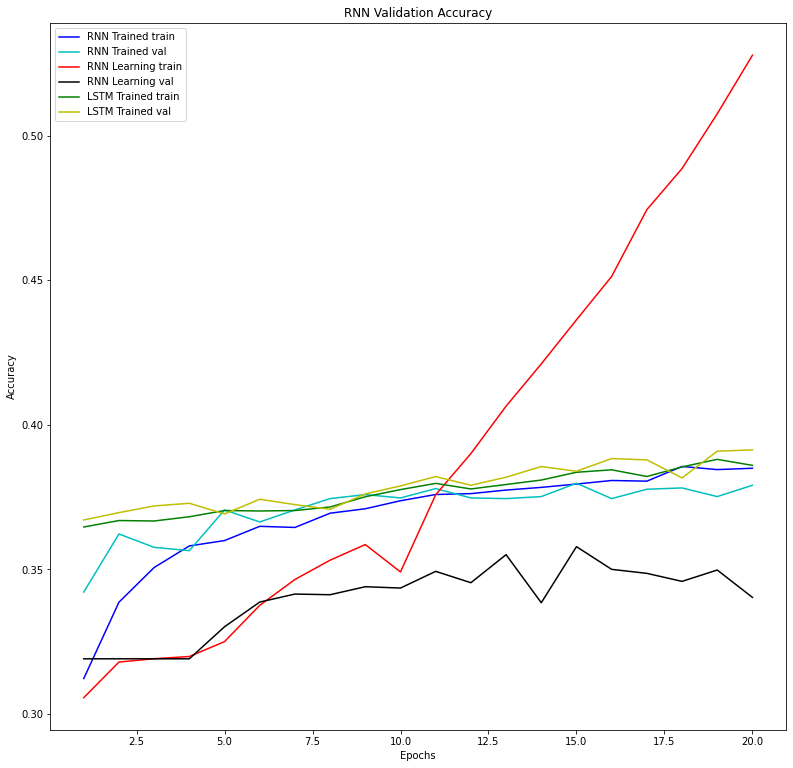

In [ ]:
import matplotlib.pyplot as plt

loss_train_RNN_trained = history_RNN_trained_embeddings.history['accuracy']
loss_val_RNN_trained = history_RNN_trained_embeddings.history['val_accuracy']

loss_train_LSTM_trained = history_LSTM_trained_embeddings.history['accuracy']
loss_val_LSTM_trained = history_LSTM_trained_embeddings.history['val_accuracy']

loss_train_RNN_learning = history_RNN_learning_embeddings.history['accuracy']
loss_val_RNN_learning = history_RNN_learning_embeddings.history['val_accuracy']


epochs = range(1,21)
plt.figure(figsize=(29, 13))
plt.subplot(1, 2, 1)
plt.title('RNN Validation Accuracy') 
plt.plot(epochs, loss_train_RNN_trained, 'b', label='RNN Trained train')
plt.plot(epochs, loss_val_RNN_trained, 'c', label='RNN Trained val')
plt.plot(epochs, loss_train_RNN_learning, 'r', label='RNN Learning train')
plt.plot(epochs, loss_val_RNN_learning, 'k', label='RNN Learning val')
plt.plot(epochs, loss_train_LSTM_trained, 'g', label='LSTM Trained train')
plt.plot(epochs, loss_val_LSTM_trained, 'y', label='LSTM Trained val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

learning is slower but better.

____________________________________________________________________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________________________________________________________________

## Final Results:



**The accuracy for classification of communities from a social network in healts topics:**

1.   Random forest based on eigen vectors of the laplacian:   **0.4585**
2.   Node2Vec based on random walks inside a LR model:    **0.1307**
3.   GCN based on adjacency and feature matrix multiply - inside a LR model:    **0.4887**
4.   RNN with Learning embeddings by word2 vec:  **0.5279**

#### RNN with Learning embeddings is the BEST!

## Future Work:




*   bigger dataset for better training and full picture (not only 2021)
*   doc2vec models - use uniqe hebrew features, parsing with morphological analysis
*   Laplacian eigen vectors - fine tune the results to ~48%
*   GCN - train a multy output logistic regression classifier
*   For the RNN&LSTM - try more epochs, different layers structure and sizes
*   try different models - CNN, Transformer
